# Convolutional Neural Networks

In this notebook, we train a CNN to classify images from the CIFAR-10 database.

## 1. Load CIFAR-10 Database

In [3]:
import keras
from keras.datasets import cifar10

# load the pre-shuffled train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


Using TensorFlow backend.


170508288/170498071 [==============================] - 34s 0us/step


## 2. Visualize the First 24 Training Images¶

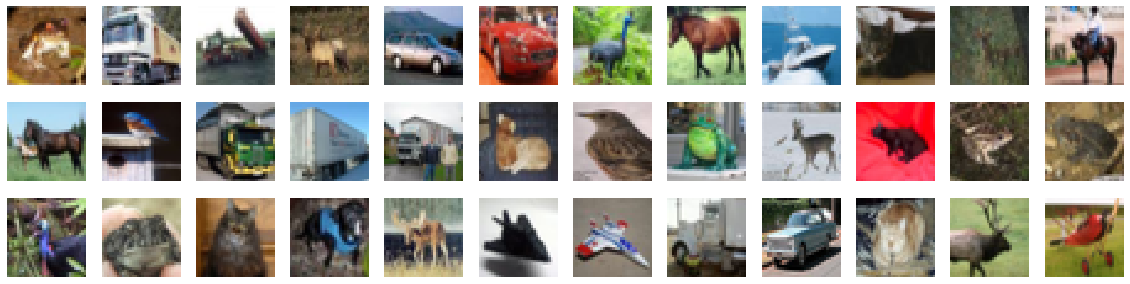

In [4]:
    
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(36):
  ax = fig.add_subplot(3, 12, i+1, xticks=[], yticks=[])
  ax.imshow(np.squeeze(x_train[i]))

## 3. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [0]:
# rescale [0,255] --> [0,1]
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

## 4. Break Dataset into Training, Testing, and Validation Sets

In [6]:
from keras.utils import np_utils

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

('x_train shape:', (45000, 32, 32, 3))
(45000, 'train samples')
(10000, 'test samples')
(5000, 'validation samples')


## 5. Define the Model Architecture

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu', 
                        input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        416       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        8256      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 64)          16448     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 4, 4, 64)          0         
__________

## 6. Compile the Model

In [0]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

## 7. Train the Model

In [12]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=32, epochs=100,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
 - 14s - loss: 1.5850 - acc: 0.4223 - val_loss: 1.2127 - val_acc: 0.5642

Epoch 00001: val_loss improved from inf to 1.21272, saving model to model.weights.best.hdf5
Epoch 2/100
 - 14s - loss: 1.2440 - acc: 0.5578 - val_loss: 1.2291 - val_acc: 0.5722

Epoch 00002: val_loss did not improve
Epoch 3/100
 - 14s - loss: 1.1197 - acc: 0.6036 - val_loss: 1.0545 - val_acc: 0.6280

Epoch 00003: val_loss improved from 1.21272 to 1.05447, saving model to model.weights.best.hdf5
Epoch 4/100
 - 14s - loss: 1.0395 - acc: 0.6379 - val_loss: 0.9532 - val_acc: 0.6634

Epoch 00004: val_loss improved from 1.05447 to 0.95319, saving model to model.weights.best.hdf5
Epoch 5/100
 - 14s - loss: 1.0022 - acc: 0.6539 - val_loss: 0.9441 - val_acc: 0.6692

Epoch 00005: val_loss improved from 0.95319 to 0.94414, saving model to model.weights.best.hdf5
Epoch 6/100
 - 14s - loss: 0.9773 - acc: 0.6621 - val_loss: 1.0449 - val_acc: 0.6476

Epoch 00006: val_

 - 13s - loss: 1.3353 - acc: 0.5624 - val_loss: 1.3517 - val_acc: 0.5560

Epoch 00026: val_loss did not improve
Epoch 27/100
 - 14s - loss: 1.3489 - acc: 0.5530 - val_loss: 1.4003 - val_acc: 0.5612

Epoch 00027: val_loss did not improve
Epoch 28/100
 - 14s - loss: 1.3655 - acc: 0.5488 - val_loss: 1.1295 - val_acc: 0.6222

Epoch 00028: val_loss did not improve
Epoch 29/100
 - 14s - loss: 1.3835 - acc: 0.5410 - val_loss: 1.1456 - val_acc: 0.6048

Epoch 00029: val_loss did not improve
Epoch 30/100
 - 14s - loss: 1.4190 - acc: 0.5284 - val_loss: 2.0831 - val_acc: 0.4248

Epoch 00030: val_loss did not improve
Epoch 31/100
 - 14s - loss: 1.4295 - acc: 0.5280 - val_loss: 1.2523 - val_acc: 0.5828

Epoch 00031: val_loss did not improve
Epoch 32/100
 - 14s - loss: 1.4409 - acc: 0.5214 - val_loss: 1.1373 - val_acc: 0.6032

Epoch 00032: val_loss did not improve
Epoch 33/100
 - 14s - loss: 1.4391 - acc: 0.5186 - val_loss: 1.3232 - val_acc: 0.5470

Epoch 00033: val_loss did not improve
Epoch 34/100



Epoch 00053: val_loss did not improve
Epoch 54/100
 - 14s - loss: 1.7111 - acc: 0.4045 - val_loss: 1.4613 - val_acc: 0.4816

Epoch 00054: val_loss did not improve
Epoch 55/100
 - 14s - loss: 1.7168 - acc: 0.3996 - val_loss: 1.9949 - val_acc: 0.3706

Epoch 00055: val_loss did not improve
Epoch 56/100
 - 14s - loss: 1.7350 - acc: 0.3944 - val_loss: 2.3800 - val_acc: 0.3114

Epoch 00056: val_loss did not improve
Epoch 57/100
 - 14s - loss: 1.7613 - acc: 0.3799 - val_loss: 2.1972 - val_acc: 0.3490

Epoch 00057: val_loss did not improve
Epoch 58/100
 - 13s - loss: 1.7658 - acc: 0.3752 - val_loss: 1.5752 - val_acc: 0.3914

Epoch 00058: val_loss did not improve
Epoch 59/100
 - 14s - loss: 1.7521 - acc: 0.3772 - val_loss: 1.5635 - val_acc: 0.4442

Epoch 00059: val_loss did not improve
Epoch 60/100
 - 14s - loss: 1.7772 - acc: 0.3726 - val_loss: 1.5247 - val_acc: 0.4514

Epoch 00060: val_loss did not improve
Epoch 61/100
 - 14s - loss: 1.7829 - acc: 0.3699 - val_loss: 1.6458 - val_acc: 0.3880



Epoch 00081: val_loss did not improve
Epoch 82/100
 - 14s - loss: 1.8510 - acc: 0.3290 - val_loss: 1.8203 - val_acc: 0.3176

Epoch 00082: val_loss did not improve
Epoch 83/100
 - 14s - loss: 1.8729 - acc: 0.3283 - val_loss: 2.1706 - val_acc: 0.2976

Epoch 00083: val_loss did not improve
Epoch 84/100
 - 14s - loss: 1.8888 - acc: 0.3212 - val_loss: 1.7608 - val_acc: 0.3856

Epoch 00084: val_loss did not improve
Epoch 85/100
 - 14s - loss: 1.8827 - acc: 0.3197 - val_loss: 1.8863 - val_acc: 0.3254

Epoch 00085: val_loss did not improve
Epoch 86/100
 - 14s - loss: 1.8733 - acc: 0.3275 - val_loss: 1.6901 - val_acc: 0.3730

Epoch 00086: val_loss did not improve
Epoch 87/100
 - 14s - loss: 1.8708 - acc: 0.3183 - val_loss: 1.6427 - val_acc: 0.4230

Epoch 00087: val_loss did not improve
Epoch 88/100
 - 14s - loss: 1.8769 - acc: 0.3183 - val_loss: 1.7833 - val_acc: 0.3582

Epoch 00088: val_loss did not improve
Epoch 89/100
 - 14s - loss: 1.8757 - acc: 0.3191 - val_loss: 1.9501 - val_acc: 0.2922


## 8. Load the Model with the Best Validation Accuracy

In [0]:

# load the weights that yielded the best validation accuracy
model.load_weights('model.weights.best.hdf5')

## 9. Calculate Classification Accuracy on Test Set

In [14]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])

('\n', 'Test accuracy:', 0.7034)


## 10. Visualize Some Predictions

This may give you some insight into why the network is misclassifying certain objects.

In [0]:
# get predictions on the test set
y_hat = model.predict(x_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

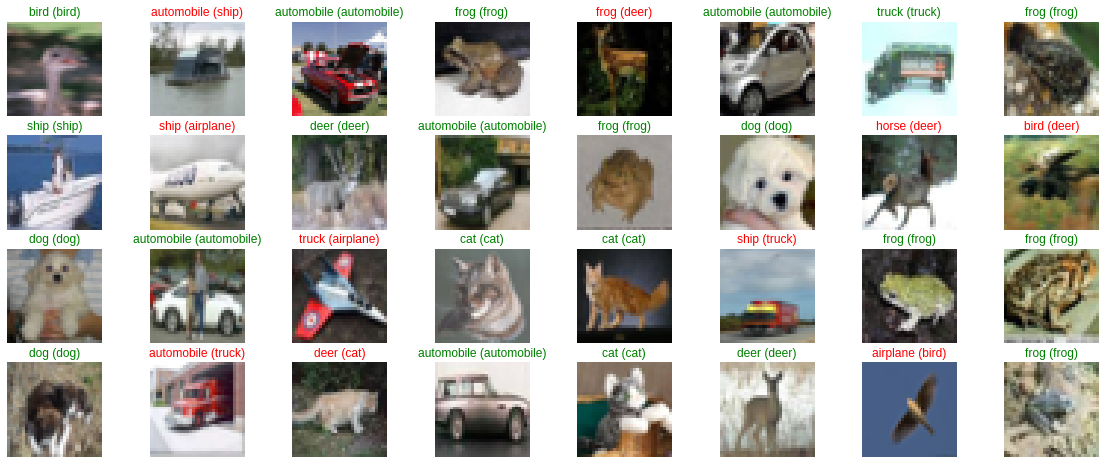

In [16]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))